<a href="https://colab.research.google.com/github/kdibba/DataAnalyticsProject/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("/content/Housing.csv")

In [ ]:
print("Dataset has ",df.shape[0],"Records/Rows and ",df.shape[1],"attributes/columns.")

Dataset has  545 Records/Rows and  13 attributes/columns.


In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Columns: 13 entries, price to furnishingstatus
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe(include="object")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [ ]:
df.describe(include=[int,float])

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
100,6230000,6600,3,2,1,yes,no,yes,no,yes,0,yes,unfurnished
337,3920000,2145,4,2,1,yes,no,yes,no,no,0,yes,unfurnished
81,6615000,4000,3,2,2,yes,no,yes,no,yes,1,no,semi-furnished
485,2870000,3630,2,1,1,yes,no,no,no,no,0,no,unfurnished
249,4543000,4990,4,2,2,yes,yes,yes,no,no,0,yes,furnished


In [ ]:
null_entries_df = df[df.isnull().any(axis=1) & ~df.isnull().all(axis=1)]
null_entries_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


No missing data

<Axes: title={'center': 'Price'}, ylabel='Frequency'>

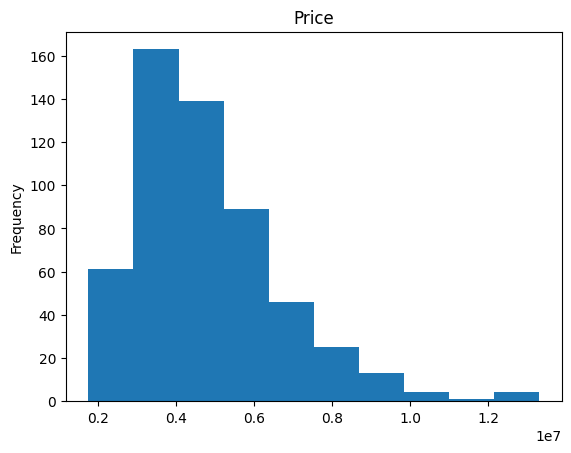

In [ ]:
df['price'].plot(kind='hist', bins=10, title = 'Price')

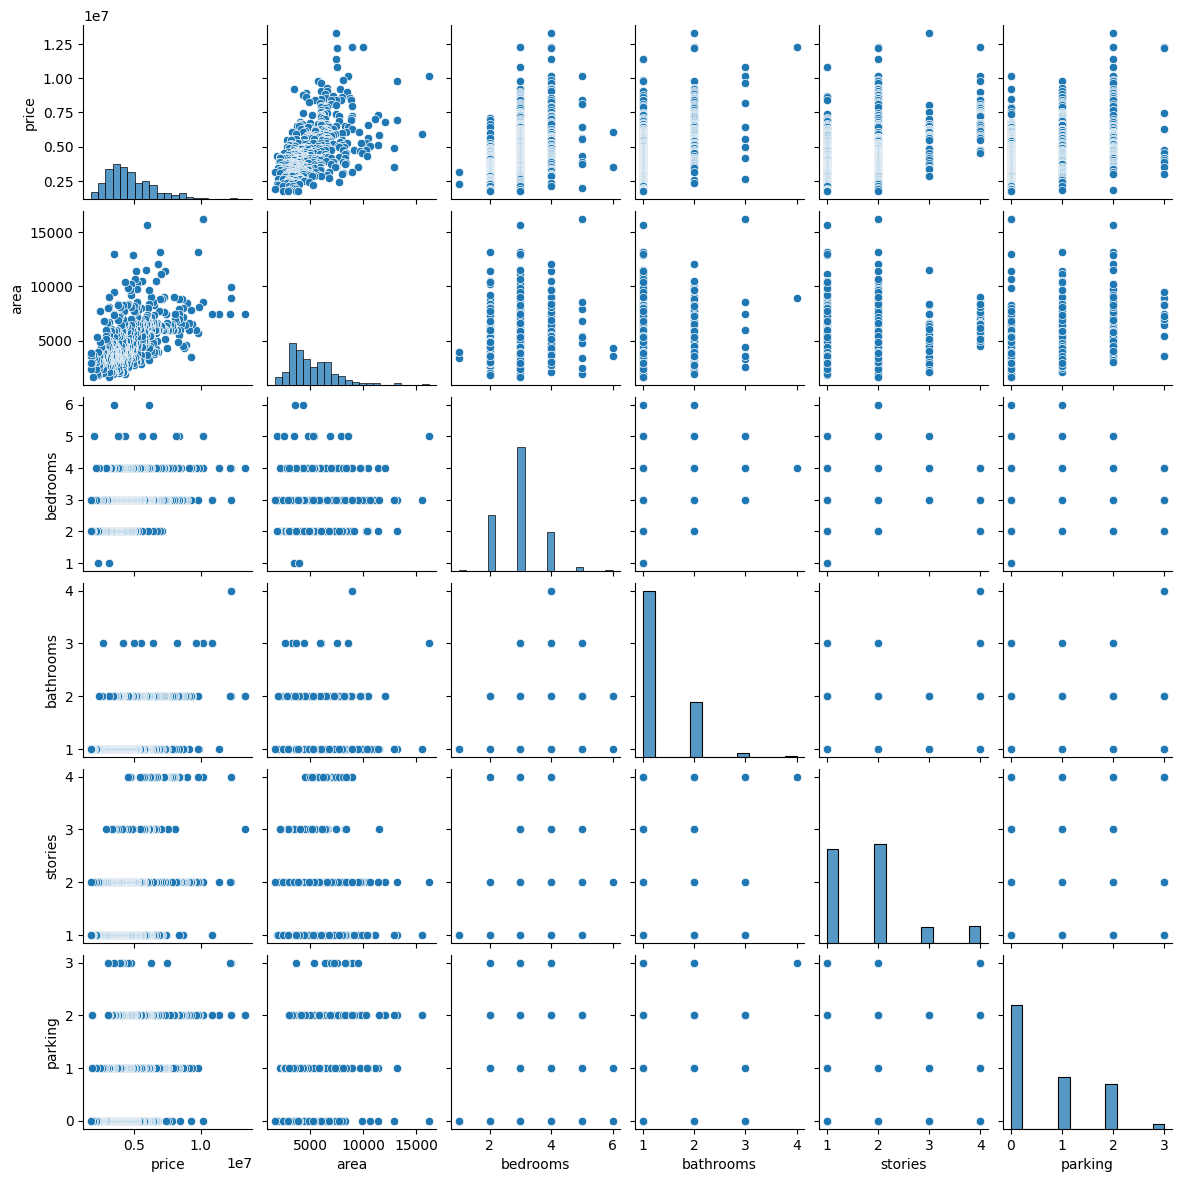

In [ ]:
ax = sns.pairplot(df, height = 2);

In [ ]:
# Encoding - Features that have binary, integer values.
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']
for c in binary_cols:
    df[c] = df[c].replace(to_replace=['yes'], value=1)
    df[c] = df[c].replace(to_replace=['no'], value=0)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [ ]:
# Encoding Categories that has non binary, non interger values
cat_cols = [c for c in df.columns if df[c].dtype == 'object']
cat_data = df[cat_cols]
cat_cols

['furnishingstatus']

In [ ]:
encoded_data = pd.get_dummies(df, columns=cat_cols)
encoded_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
encoded_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

<Axes: >

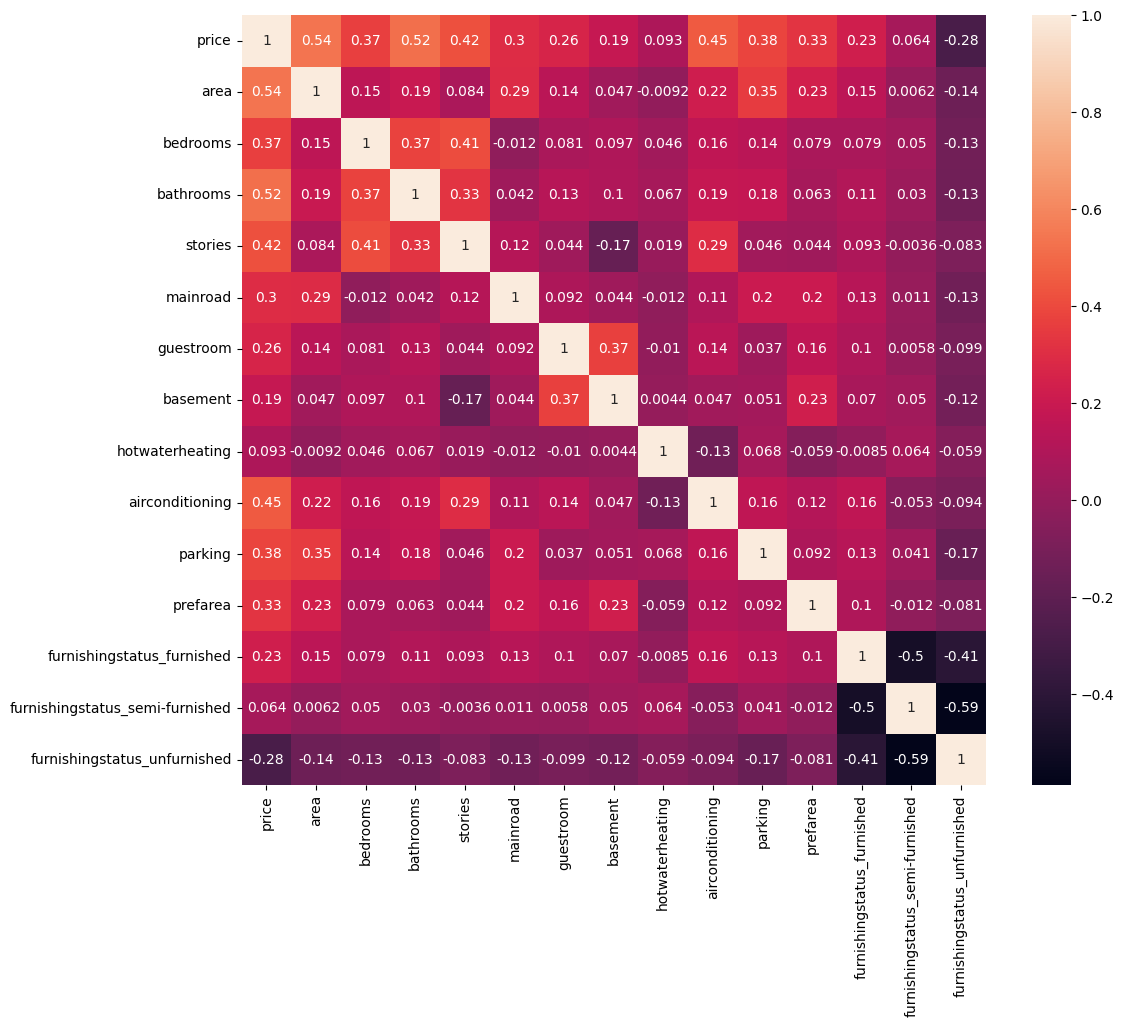

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), annot = True, ax=ax)

In [ ]:
#interaction columns
interaction_df = encoded_data
interaction_df = interaction_df.assign(
    not_unfurnished=encoded_data['furnishingstatus_semi-furnished']+
    encoded_data['furnishingstatus_furnished'])
interaction_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,not_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,1


<Axes: >

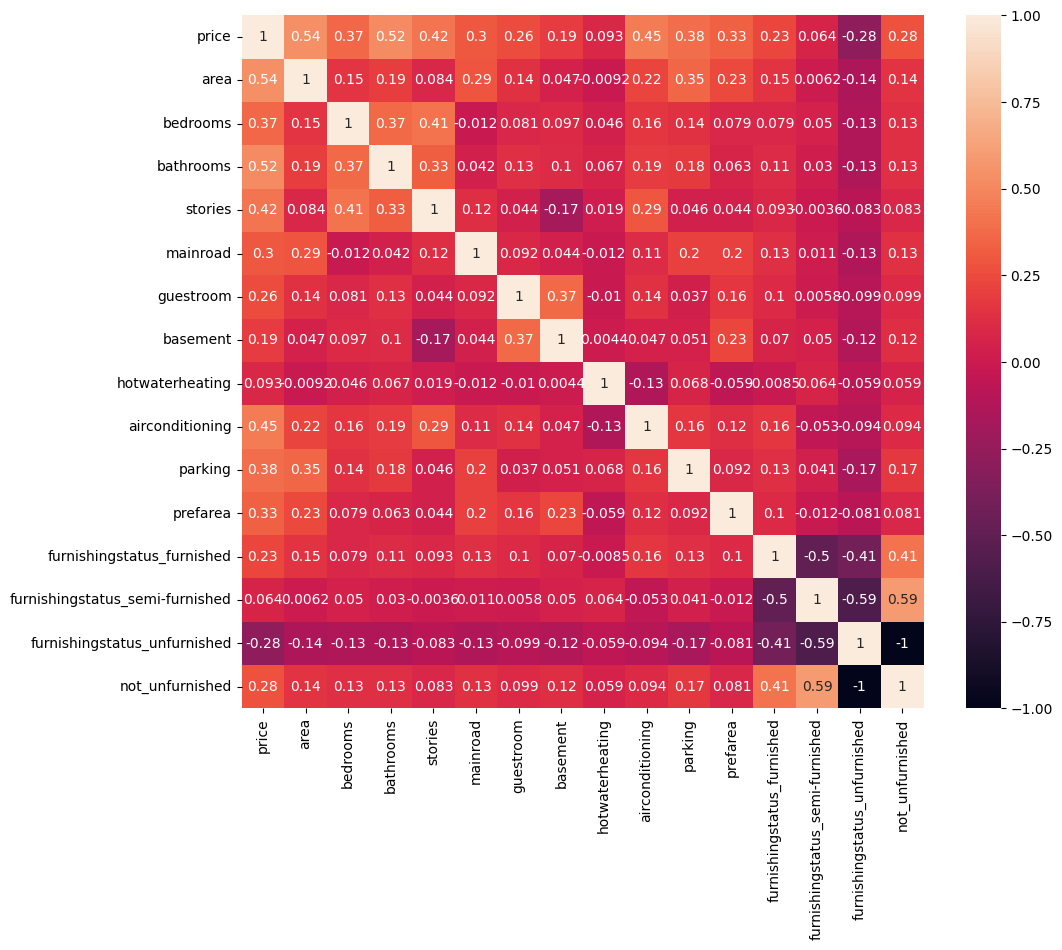

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(interaction_df.corr(), annot = True, ax=ax)

In [ ]:
#drop features with less than 27% correlation
correlation_threshold = 0.27
correlations = interaction_df.corr()['price']
correlations

price                              1.000000
area                               0.535997
bedrooms                           0.366494
bathrooms                          0.517545
stories                            0.420712
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
airconditioning                    0.452954
parking                            0.384394
prefarea                           0.329777
furnishingstatus_furnished         0.229350
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
not_unfurnished                    0.280587
Name: price, dtype: float64

In [ ]:
selected_columns = correlations[correlations < correlation_threshold].index
selected_columns

Index(['guestroom', 'basement', 'hotwaterheating',
       'furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
final_data = interaction_df.drop(['guestroom', 'basement', 'hotwaterheating',
       'furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'], axis=1)
final_data

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,not_unfurnished
0,13300000,7420,4,2,3,1,1,2,1,1
1,12250000,8960,4,4,4,1,1,3,0,1
2,12250000,9960,3,2,2,1,0,2,1,1
3,12215000,7500,4,2,2,1,1,3,1,1
4,11410000,7420,4,1,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,1


<Axes: >

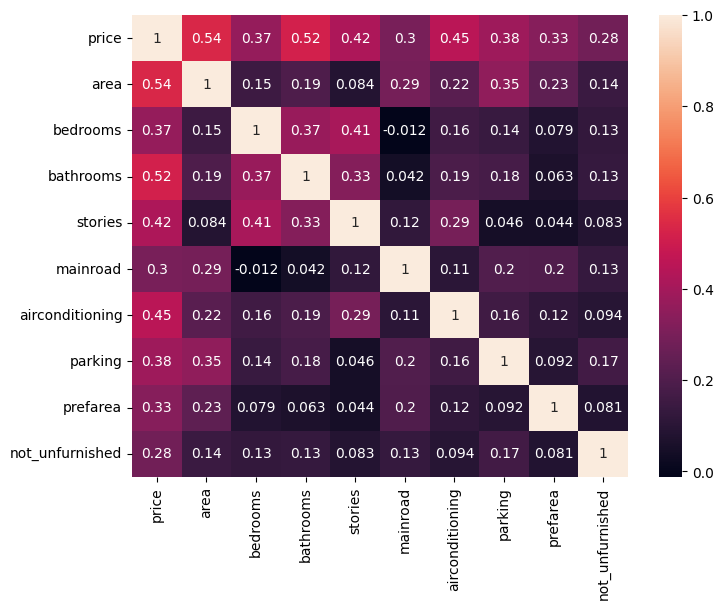

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(final_data.corr(), annot = True, ax=ax)

#Linear Regression

In [ ]:
X = np.array(final_data[['area',	'bedrooms',	'bathrooms',	'stories',	'mainroad',	'airconditioning',	'parking',	'prefarea',	'not_unfurnished']])
y = np.array(final_data['price'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train.shape

(381, 9)

In [ ]:
X_test.shape

(164, 9)

In [ ]:
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories','parking']
num_cols

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [ ]:
reg_multi = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg_multi.predict(X_test)

[Text(0.5, 0, 'actual price'),
 Text(0, 0.5, 'predicted price'),
 Text(0.5, 1.0, 'Multi Linear Regression: Predicted values vs Actual price')]

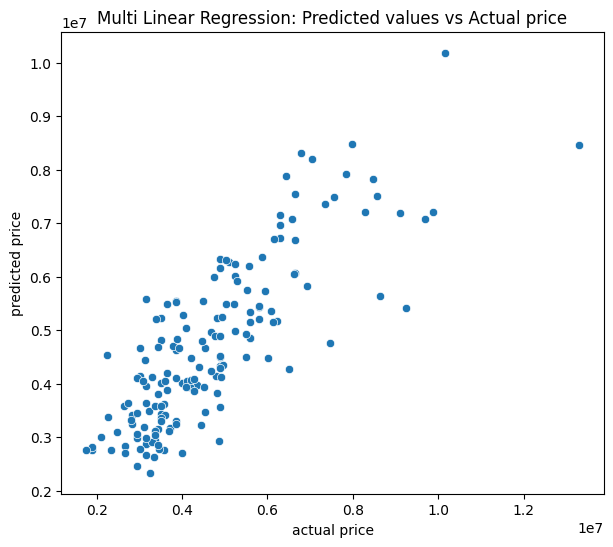

In [ ]:
fig=plt.figure(figsize=(7,6))
sns.scatterplot(data=X_test, x=y_test, y=y_pred).set(xlabel="actual price", ylabel="predicted price", title="Multi Linear Regression: Predicted values vs Actual price")

In [ ]:
r2  = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
print(r2, mse)

0.6658057205057697 1127655842720.638


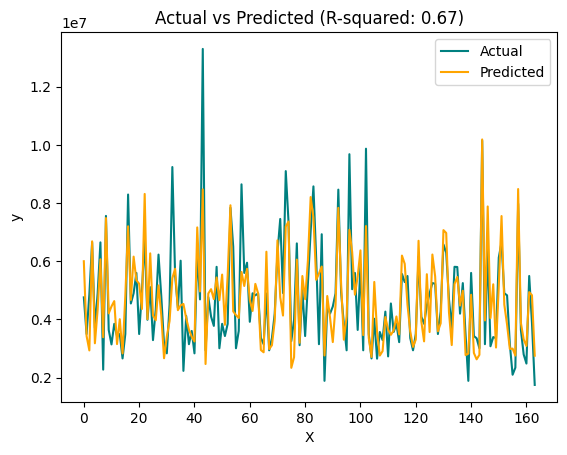

In [ ]:
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='teal')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted', color='orange')
plt.xlabel('Actual - y')
plt.ylabel('Predicted - y^')
plt.title(f'Actual vs Predicted (R-squared: {r2:.2f})')
plt.legend()
plt.show()

#Kfold

In [ ]:
X = np.array(final_data[['area',	'bedrooms',	'bathrooms',	'stories',	'mainroad',	'airconditioning',	'parking',	'prefarea',	'not_unfurnished']])
y = np.array(final_data['price'])

array([[7420,    4,    2, ...,    2,    1,    1],
       [8960,    4,    4, ...,    3,    0,    1],
       [9960,    3,    2, ...,    2,    1,    1],
       ...,
       [3620,    2,    1, ...,    0,    0,    0],
       [2910,    3,    1, ...,    0,    0,    1],
       [3850,    3,    1, ...,    0,    0,    0]])

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_tr.shape

(436, 9)

In [ ]:
nfold = 30

r2_train = np.zeros(nfold)
r2_val = np.zeros(nfold)
r2_test = np.zeros(nfold)
best_r2 = 0
best_train_data = None

In [ ]:
kf = KFold(n_splits=nfold, shuffle=True)
kf.get_n_splits(X_tr)

for isplit, idx in enumerate(kf.split(X_tr)):
    X_kfold_train, X_val, y_kfold_train, y_val = X_tr[idx[0]], X_tr[idx[1]],
    y_tr[idx[0]], y_tr[idx[1]]
    model = LinearRegression()
    model.fit(X_kfold_train, y_kfold_train)

    y_train_pred = model.predict(X_kfold_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_ts)
    r2_train[isplit] = metrics.r2_score(y_kfold_train, y_train_pred)
    r2_val[isplit] = metrics.r2_score(y_val, y_val_pred)
    r2_test[isplit] = metrics.r2_score(y_ts, y_test_pred)
    if r2_val[isplit] > best_r2:
        best_r2 = r2_val[isplit]
        best_train_data = (X_kfold_train, y_kfold_train)

In [ ]:
r2_train

array([0.63294802, 0.62572133, 0.64048133, 0.62567209, 0.62663503,
       0.63182842, 0.63378227, 0.63793824, 0.62936518, 0.63605894,
       0.63445615, 0.63682159, 0.63708279, 0.63305498, 0.63056923,
       0.62906632, 0.62751863, 0.63551702, 0.63235451, 0.62981426,
       0.64069914, 0.63045274, 0.63168445, 0.63707971, 0.63220511,
       0.62229732, 0.6348829 , 0.62340478, 0.64195155, 0.63308511])

In [ ]:
r2_val

array([0.57173969, 0.69368425, 0.34144934, 0.72285904, 0.77649292,
       0.63561223, 0.53671488, 0.08242472, 0.61412337, 0.40302634,
       0.50760793, 0.34687815, 0.06350457, 0.45756278, 0.66802205,
       0.70114088, 0.77099575, 0.33213603, 0.57648242, 0.6217275 ,
       0.25990141, 0.73287322, 0.58445775, 0.48035355, 0.62077586,
       0.79879016, 0.52742342, 0.74757294, 0.39534998, 0.32480626])

In [ ]:
best_model_number = np.argmax(r2_val)
best_model_number

25

In [ ]:
r2_test

array([0.72723969, 0.72424216, 0.73190791, 0.73178781, 0.72830109,
       0.72472202, 0.7316024 , 0.73176514, 0.72933852, 0.73106696,
       0.72955176, 0.72754166, 0.72580838, 0.7268664 , 0.72384715,
       0.72504636, 0.72924087, 0.72646656, 0.73135093, 0.72021263,
       0.72838679, 0.72709402, 0.72794114, 0.72673055, 0.72690982,
       0.72618489, 0.72710939, 0.72442055, 0.73051695, 0.72633501])

In [ ]:
best_r2 #validation

0.7987901640538279

In [ ]:
r2_test[best_model_number]

0.7261848857592308

In [ ]:
r2_avg=np.mean(r2_val)
r2_avg

0.5298829791760986

In [ ]:
best_model = LinearRegression().fit(best_train_data[0], best_train_data[1])
y_best_pred = model.predict(X_ts)
r2_best = metrics.r2_score(y_ts, y_best_pred)

[Text(0.5, 0, 'actual price'),
 Text(0, 0.5, 'predicted price'),
 Text(0.5, 1.0, 'Best model from K-Fold: Predicted values vs Actual price')]

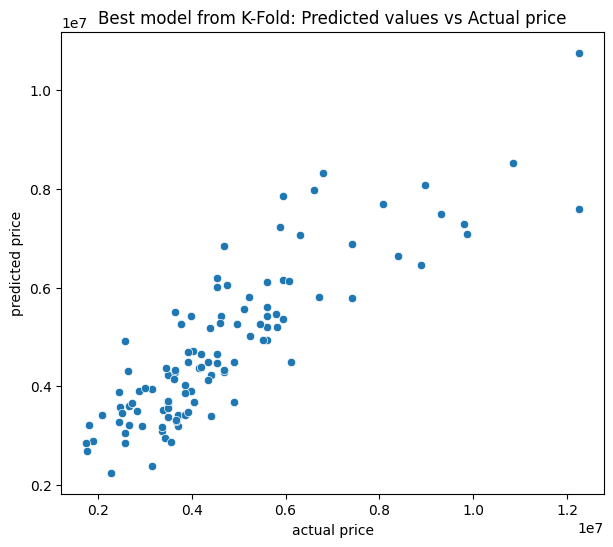

In [ ]:
fig=plt.figure(figsize=(7,6))
sns.scatterplot(data=X_ts, x=y_ts, y=y_best_pred).set(xlabel="actual price", ylabel="predicted price", title="Best model from K-Fold: Predicted values vs Actual price")

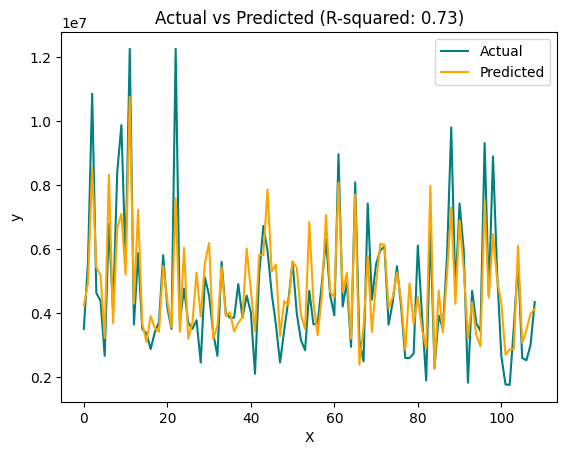

In [ ]:
plt.plot(np.arange(len(y_ts)), y_ts, label='Actual', color='teal')
plt.plot(np.arange(len(y_ts)), y_best_pred, label='Predicted', color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Actual vs Predicted (R-squared: {r2_test[best_model_number]:.2f})')
plt.legend()
plt.show()

In [ ]:
best_train_data[0].shape

(422, 9)

In [ ]:
X_train_kf = sm.add_constant(best_train_data[0])
print(X_train_kf.shape)
lr = sm.OLS(best_train_data[1], X_train_kf).fit()
sorted_indices = np.argsort(lr.params)[::-1]
for index in sorted_indices:
    value = lr.params[index]
    print(f"Index: {index}, Value: {value}")

(422, 10)
Index: 3, Value: 1000878.6450425802
Index: 6, Value: 835816.7031836627
Index: 8, Value: 610581.735973475
Index: 5, Value: 491260.4953560519
Index: 9, Value: 451169.8560844011
Index: 4, Value: 329881.00958531833
Index: 7, Value: 247868.10975519737
Index: 2, Value: 180482.02383163272
Index: 1, Value: 246.89089381763804
Index: 0, Value: -217163.9667769772


#More Models

In [ ]:
y = final_data['price']
X = final_data.drop(columns=['price'])
X

,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,not_unfurnished
0,7420,4,2,3,1,1,2,1,1
1,8960,4,4,4,1,1,3,0,1
2,9960,3,2,2,1,0,2,1,1
3,7500,4,2,2,1,1,3,1,1
4,7420,4,1,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,2,0,0
541,2400,3,1,1,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0
543,2910,3,1,1,0,0,0,0,1


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
x_tra,x_tes,y_tra,y_tes = train_test_split(X_scaled,y, test_size=0.3, random_state=0, shuffle=True)

In [ ]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [ ]:
def model_evaluation(model):
    model.fit(x_tra, y_tra)
    y_tr_pred= model.predict(x_tra)
    y_ts_pred = model.predict(x_tes)

    #Metrics Calculation.
    mae = mean_absolute_error(y_tes,y_ts_pred)
    mse = mean_squared_error(y_tes,y_ts_pred)
    r2 = r2_score(y_tes,y_ts_pred)

    mae_value.append(mae)
    mse_value.append(mse)
    r2_value.append(r2)

    print(f"R2 Score of the {model} model is=>",r2)
    print()
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)

    # Scatter plot.
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(y_tra, y_tr_pred, color='teal', label='Train')
    plt.scatter(y_tes, y_ts_pred, color='orange', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)

    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(y_tr_pred, y_tr_pred - y_tra, color='teal', label='Train')
    plt.scatter(y_ts_pred, y_ts_pred - y_tes, color='orange', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()


    fig=plt.figure(figsize=(7,6))
    sns.scatterplot(data=x_tes, x=y_tes, y=y_ts_pred).set(xlabel="actual price", ylabel="predicted price", title=f"{model}: Predicted values vs Actual price")

    X_train_lm = sm.add_constant(x_tra)
    lr = sm.OLS(y_tra, X_train_lm).fit()
    print(lr.params.sort_values(ascending = False))

R2 Score of the LinearRegression() model is=> 0.7357475183380022

MAE of LinearRegression() model is=> 733750.1322318871
MSE of LinearRegression() model is=> 916632279618.629


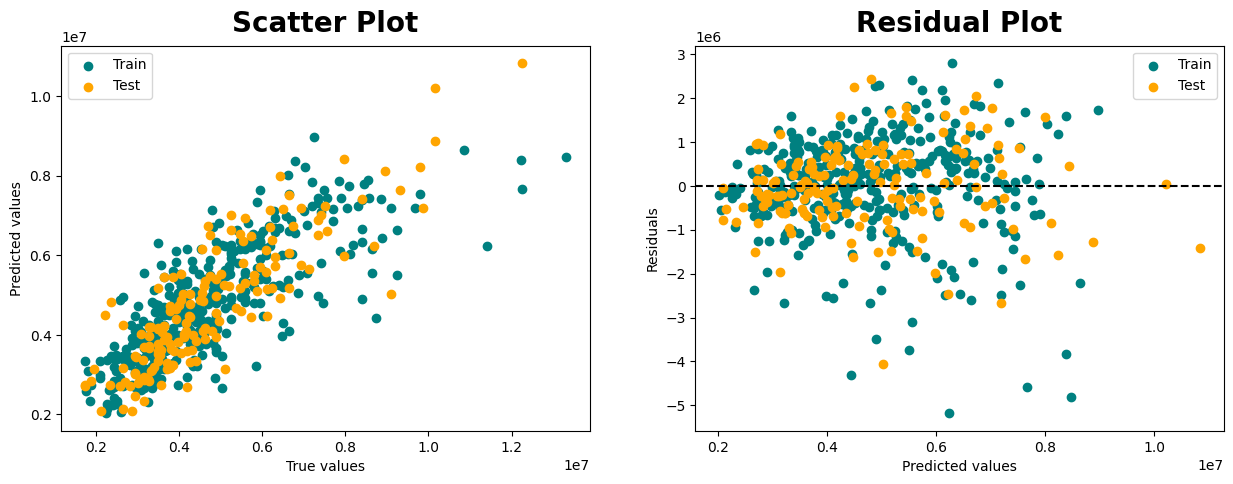

const    4.763927e+06
x3       5.400685e+05
x1       5.224118e+05
x6       3.958922e+05
x8       3.409127e+05
x4       3.216599e+05
x7       2.245776e+05
x9       2.103494e+05
x5       1.713070e+05
x2       1.437099e+05
dtype: float64


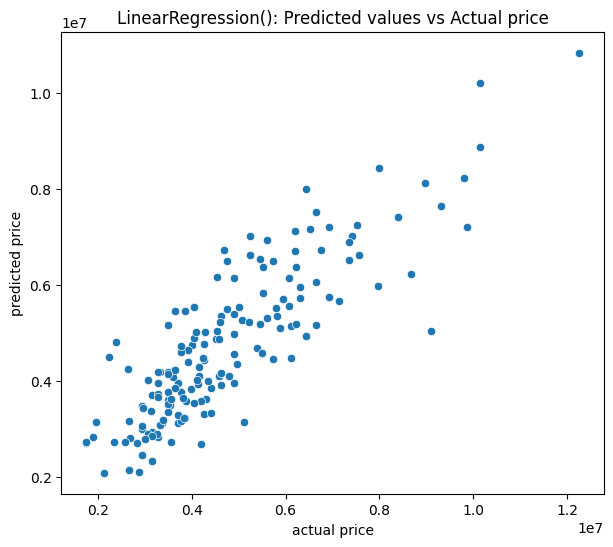

In [ ]:
model_evaluation(LinearRegression())

R2 Score of the KNeighborsRegressor(n_neighbors=10) model is=> 0.6881369119741845

MAE of KNeighborsRegressor(n_neighbors=10) model is=> 752912.3170731707
MSE of KNeighborsRegressor(n_neighbors=10) model is=> 1081782738644.8292


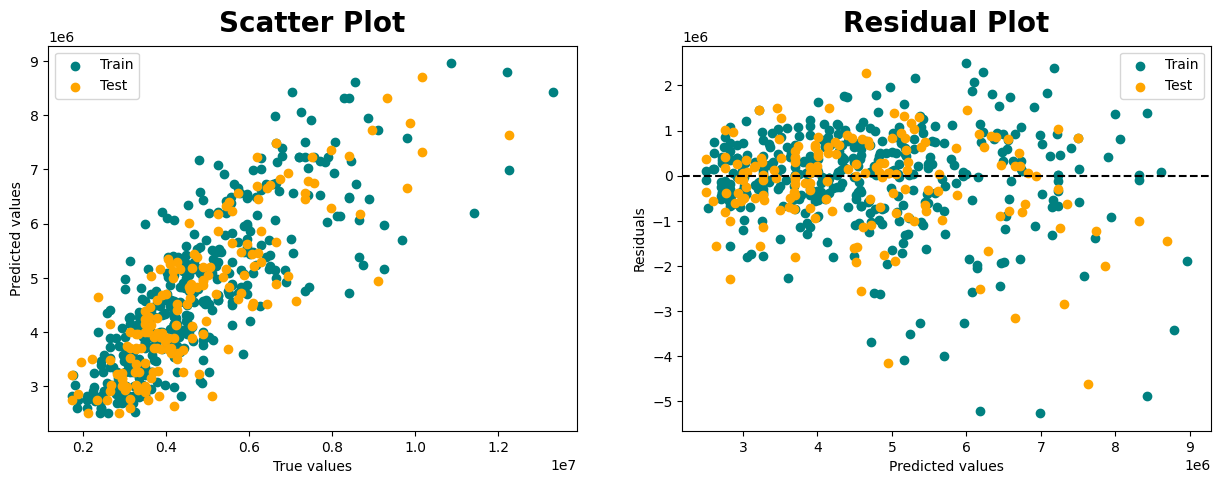

const    4.763927e+06
x3       5.400685e+05
x1       5.224118e+05
x6       3.958922e+05
x8       3.409127e+05
x4       3.216599e+05
x7       2.245776e+05
x9       2.103494e+05
x5       1.713070e+05
x2       1.437099e+05
dtype: float64


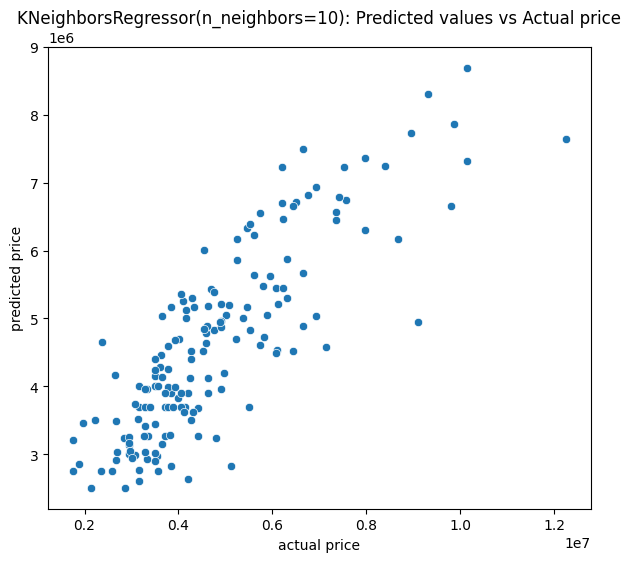

In [ ]:
model_evaluation(KNeighborsRegressor(n_neighbors=10))

R2 Score of the RandomForestRegressor() model is=> 0.5949065919331629

MAE of RandomForestRegressor() model is=> 840290.781707317
MSE of RandomForestRegressor() model is=> 1405177698840.8296


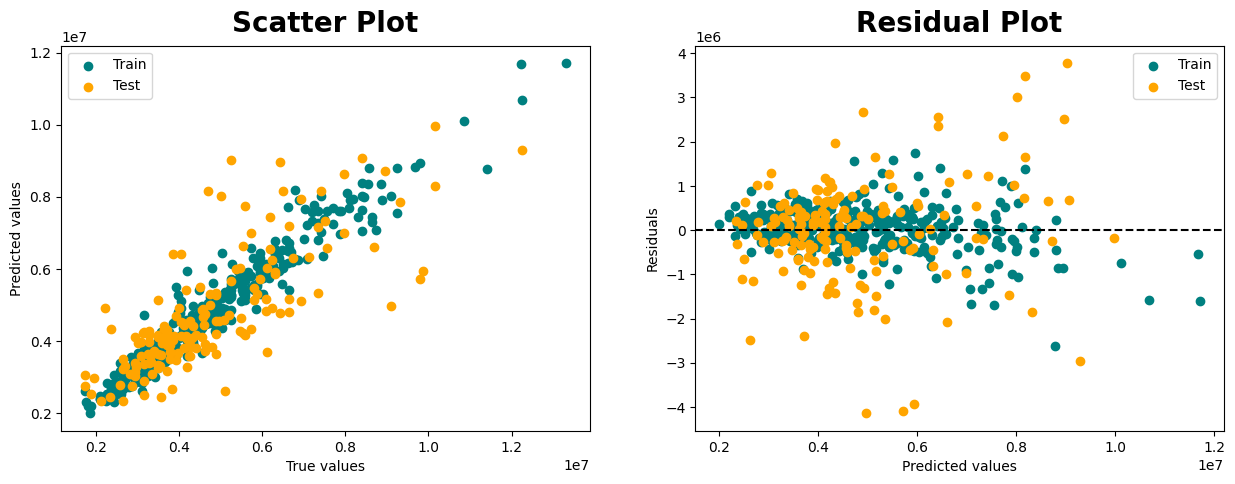

const    4.763927e+06
x3       5.400685e+05
x1       5.224118e+05
x6       3.958922e+05
x8       3.409127e+05
x4       3.216599e+05
x7       2.245776e+05
x9       2.103494e+05
x5       1.713070e+05
x2       1.437099e+05
dtype: float64


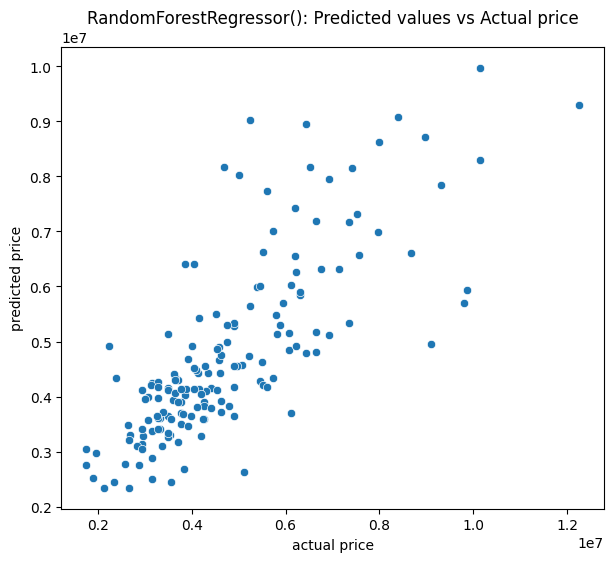

In [ ]:
model_evaluation(RandomForestRegressor())

#Thank You